# First Assignment

# Part 1:
Import libraries and init csv data

In [2]:
#imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Load dataset from CSV on Google Drive

In [4]:
dtf = pd.read_csv("/content/drive/My Drive/ColabNotebooks/adc.csv", index_col='id')

In [5]:
cols = ["FL_DATE", "AIRLINE", "AIRLINE_DOT", "AIRLINE_CODE", "DOT_CODE", "FL_NUMBER", "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "TAXI_IN", "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CRS_ELAPSED_TIME", "ELAPSED_TIME", "AIR_TIME", "DISTANCE", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
dtf = dtf[cols]

In [6]:
dtf.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
id,,,,,,,,,,,,,,,,,,,,,
1,01/09/2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0,186.0,176.0,153.0,1065,NaN,NaN,NaN,NaN,NaN
2,11/19/2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0,235.0,236.0,189.0,1399,NaN,NaN,NaN,NaN,NaN
3,7/22/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0,118.0,112.0,87.0,680,NaN,NaN,NaN,NaN,NaN
4,03/06/2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0
5,2/23/2020,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0,181.0,182.0,153.0,985,NaN,NaN,NaN,NaN,NaN


In [7]:
dtf.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.021527e+06,1.021518e+06,1.021103e+06,1.021103e+06,1.020709e+06,1.020709e+06,1.048575e+06,...,1.048575e+06,1.048568e+06,1.018570e+06,1.018570e+06,1.048575e+06,187272.000000,187272.000000,187272.000000,187272.000000,187272.000000
mean,1.997643e+04,2.511431e+03,1.327044e+03,1.329752e+03,1.012276e+01,1.664025e+01,1.352444e+03,1.462485e+03,7.680054e+00,1.490744e+03,...,2.295496e-03,1.422071e+02,1.365674e+02,1.122599e+02,8.088263e+02,24.554957,3.928735,13.176700,0.147155,25.437866
std,3.773195e+02,1.746354e+03,4.860000e+02,4.994956e+02,4.885416e+01,9.208595e+00,5.010470e+02,5.273483e+02,6.274074e+00,5.115026e+02,...,4.785634e-02,7.151879e+01,7.166583e+01,6.973204e+01,5.876740e+02,70.935348,32.278717,32.977752,3.336814,55.378909
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,2.000000e+01,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.796000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.753000e+03,1.909000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.045000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.690000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,6.950000e+02,7.220000e+02,6.670000e+02,5.812000e+03,2685.000000,1398.000000,1468.000000,377.000000,2096.000000


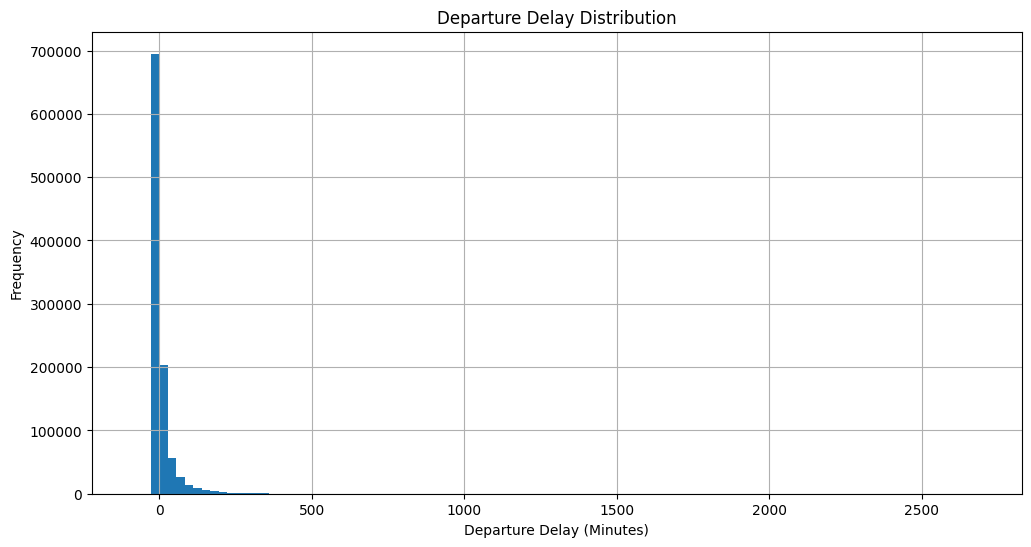

In [8]:
dtf['DEP_DELAY'].hist(bins=100, figsize=(12, 6))
plt.title("Departure Delay Distribution")
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()

Showing that most of the flights are departing in time.

<Axes: xlabel='DEP_DELAY', ylabel='Density'>

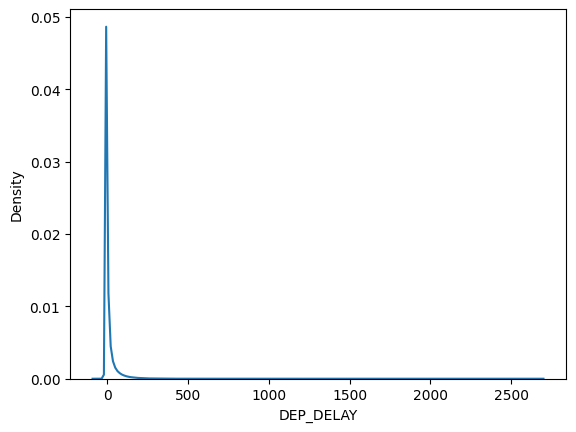

In [9]:
sns.kdeplot(dtf.DEP_DELAY)

### 1) Explanation:
Here we can see the density of delays. Mostly, the delays are non-existant or small delays.

<Axes: xlabel='DEP_TIME', ylabel='DEP_DELAY'>

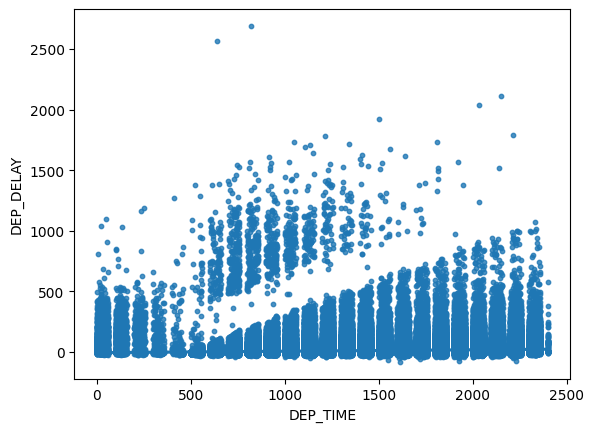

In [10]:
sns.regplot(data=dtf,x='DEP_TIME',y='DEP_DELAY', scatter_kws={'s': 10})

### Explanation:
Check the correlation of departure time of day with the delay.
Maybe the delay depends on the time of day?
We can see that between 5 AM and around 14 PM there are many delays of significant time. During the early morning the delays are existant, but not as large. It can be assosiated with the density of people travelling during the day and amounts of services that are open in the airports.

In [11]:
numeric_columns = dtf.select_dtypes(include=[np.number])

# Calculate the correlation matrix using only numeric columns
dtf_corr = numeric_columns.corr(method='pearson')

# Get the correlation of 'DEP_DELAY' with other columns
dtf_corr = dtf_corr.loc[['DEP_DELAY']]

<Axes: >

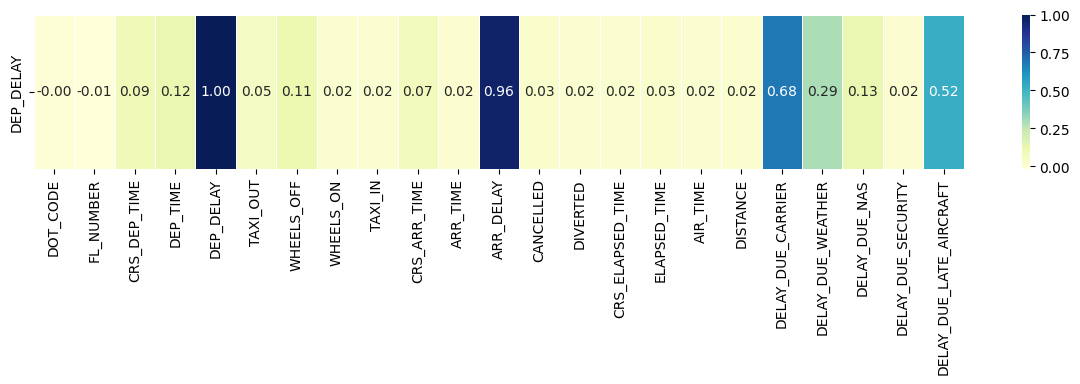

In [12]:
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

### Explanation: (Heat Map)
Here we can see that for most of the parameters, there is no correlation. However, there's high correlation with Arrival Delay (ARR_DELAY), the Carrier (Company: DELAY_DUE_CARRIER) is mostly the reason for issues with departure delays, and somewhat correlation with delay because the aircraft is late in time (not the same as ARR_DELAY).

The heat map helps us understand how the numerical features of the table relate to our target attribute (DEP_DELAY).

<Axes: xlabel='DOT_CODE', ylabel='DEP_DELAY'>

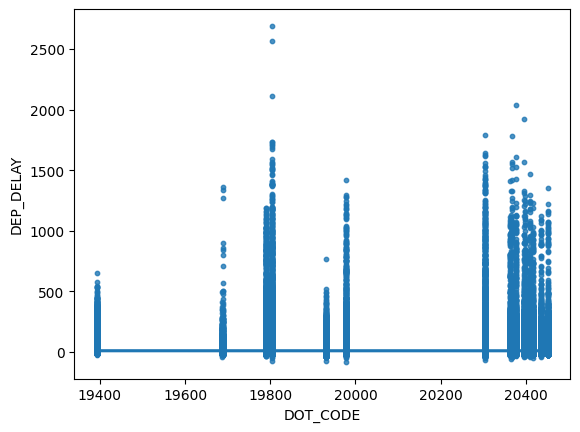

In [13]:
sns.regplot(data=dtf,x='DOT_CODE',y='DEP_DELAY', scatter_kws={'s': 10})

### 2) Explanation:
Each company has it's own CODE, assigned by the Department of Transportation (DoT). Here we can see how many delays are for each company, and maybe find the most problematic ones.
Manual:
19977 = United Airlines
19790 = Delta

and so on, which can help the customers decide which company they prefer, which is a good reason to select this parameter to evaluate against departure delay.

<Axes: xlabel='DISTANCE', ylabel='DEP_DELAY'>

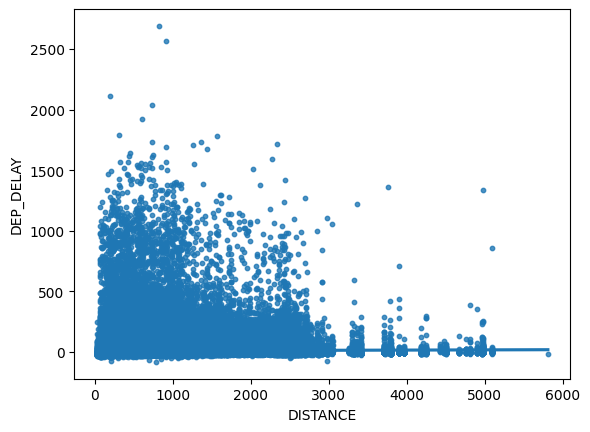

In [14]:
sns.regplot(data=dtf,x='DISTANCE',y='DEP_DELAY', scatter_kws={'s': 10})

### 3) Explanation:
There's barely any correlation between distance and departure time.
We could assume the delay can be affected by more preperations for longer flights, as more distance requires more fuel and resources. Therefore, it's possible to assume that there's no relation between amount of resources/distance to the delay in departure, despite the base assumption above.
We see that there are not enough long distance flights (>=3000km) to know that there's a connection between long distance flights and delays. However, the delays of shorter distances are much more telling and spread, thanks to amount of short flights.

<Axes: xlabel='ARR_DELAY', ylabel='DEP_DELAY'>

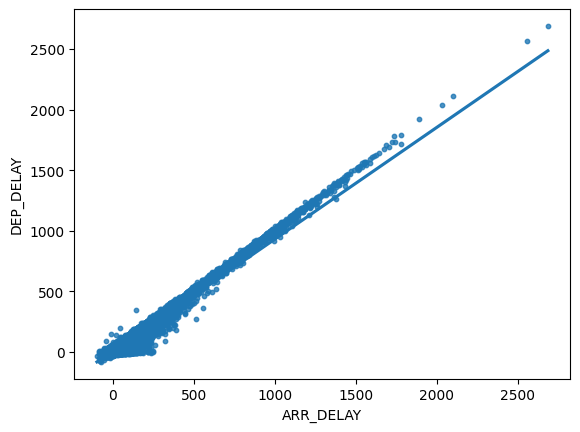

In [15]:
sns.regplot(data=dtf,x='ARR_DELAY',y='DEP_DELAY', scatter_kws={'s': 10})

### 4) Explanation:
Check if departure delay affects the arrival delay.
We can see a VERY HIGH correlation between those fields. We can conclude that there are no different performances to make the flight faster and arrive earlier, but it arrives later with about the same difference of times.

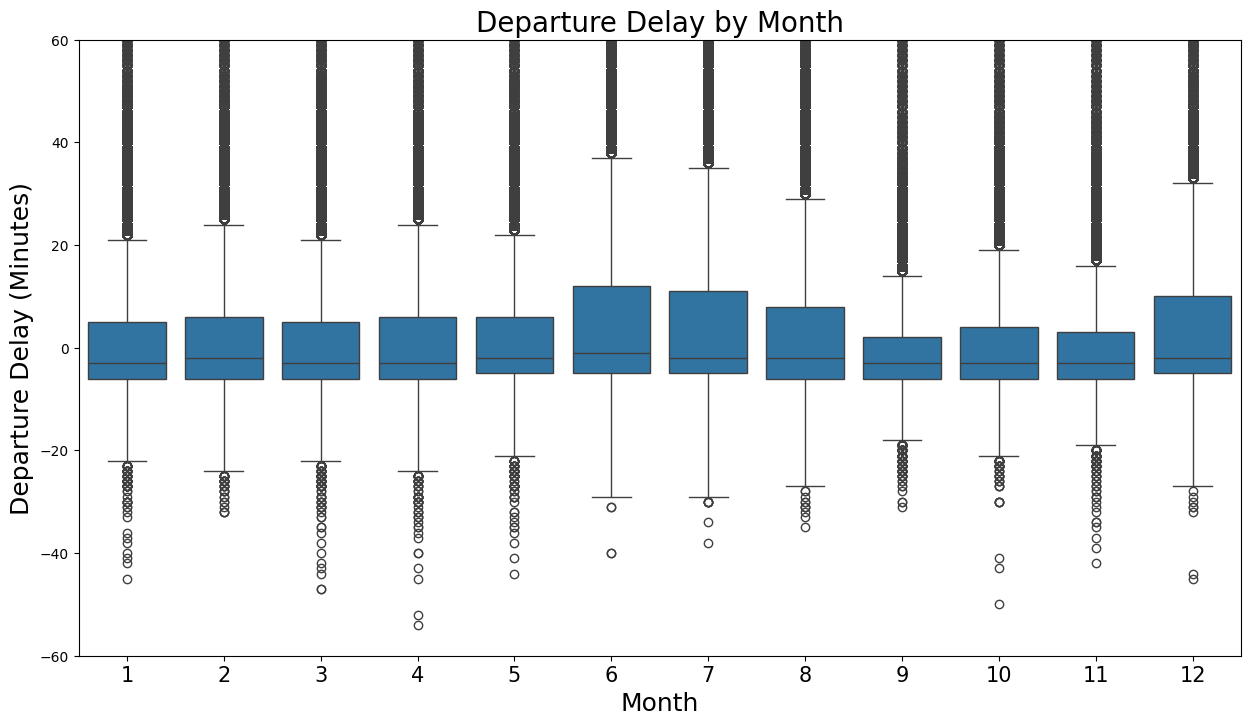

In [16]:
dtf['FL_DATE'] = pd.to_datetime(dtf['FL_DATE'])

# Extract the month from the FL_DATE column
dtf['Month'] = dtf['FL_DATE'].dt.month

plt.figure(figsize=(15, 8))
sns.boxplot(x='Month', y='DEP_DELAY', data=dtf)

plt.title("Departure Delay by Month", fontsize=20)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Departure Delay (Minutes)", fontsize=18)

plt.ylim(-60, 60)
plt.xticks(fontsize=15)

plt.show()


### 5) Explanation:
Here we divide the data according to each month. We can see that the 3rd quadrant on June is larger, meaning there are more delays of until 10 minutes, but in September-November the delays are less appearant.
For most of the years the delays are bearable (up to 25 minutes or so), however, in June, July, August and December the delays are more prevalent.
We can associate those with the yearly holidays - Christmas and the Summar vacation, when the airports are usually more crowded.

# Part 3 - Basic Model Pipeline

In [21]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Process categorical data (one-hot encoding)
df_processed = pd.get_dummies(dtf, columns=['ARR_DELAY'], drop_first=True)

# Reduce the dataset size for faster processing (use 5% of the data)
df_processed = df_processed.sample(frac=0.05, random_state=42)  # Use 5% of the data

# Handle datetime column separately
if 'FL_DATE' in df_processed.columns:
    df_processed['FL_DATE'] = pd.to_datetime(df_processed['FL_DATE'])
    df_processed['year'] = df_processed['FL_DATE'].dt.year
    df_processed['month'] = df_processed['FL_DATE'].dt.month
    df_processed['day'] = df_processed['FL_DATE'].dt.day
    df_processed['hour'] = df_processed['FL_DATE'].dt.hour
    df_processed['minute'] = df_processed['FL_DATE'].dt.minute
    df_processed['weekday'] = df_processed['FL_DATE'].dt.weekday
    df_processed.drop(columns=['FL_DATE'], inplace=True)  # Drop the original datetime column

# Define target variable and features
X = df_processed.drop(['DEP_DELAY'], axis=1)
y = df_processed['DEP_DELAY']

# Handle missing values in the target variable (y)
y_imputer = SimpleImputer(strategy='mean')  # Impute with the mean for continuous variables
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Apply imputation

# Separate categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Impute missing values for categorical columns using the most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Impute missing values for numeric columns using the mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Handle all NaNs
assert not X.isnull().values.any(), "Imputation failed! X still contains NaN values."

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Convert all features to float32 for efficiency
X = X.astype('float32')

# Check for missing values in y
assert not np.isnan(y).any(), "y contains NaN values!"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01],
    'subsample': [0.8]
}

# removed GPU support
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform RandomizedSearchCV to find the best model
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=5, cv=3, scoring='r2', verbose=1,
                                   random_state=42, n_jobs=-1, error_score='raise')

# Check if RandomizedSearchCV works without errors
try:
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    # Make predictions
    y_pred = best_model.predict(X_test)
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
except ValueError as e:
    print(f"Error during training: {e}")
    # Fallback to a simpler model fit (without hyperparameter tuning)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    print(f"R^2 Score (fallback): {r2_score(y_test, y_pred)}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
R^2 Score: 0.7139785115014037


## Residual calculations:

Find differences between the true values and the predicted values.
It helps to identify patterns and biases in the data.

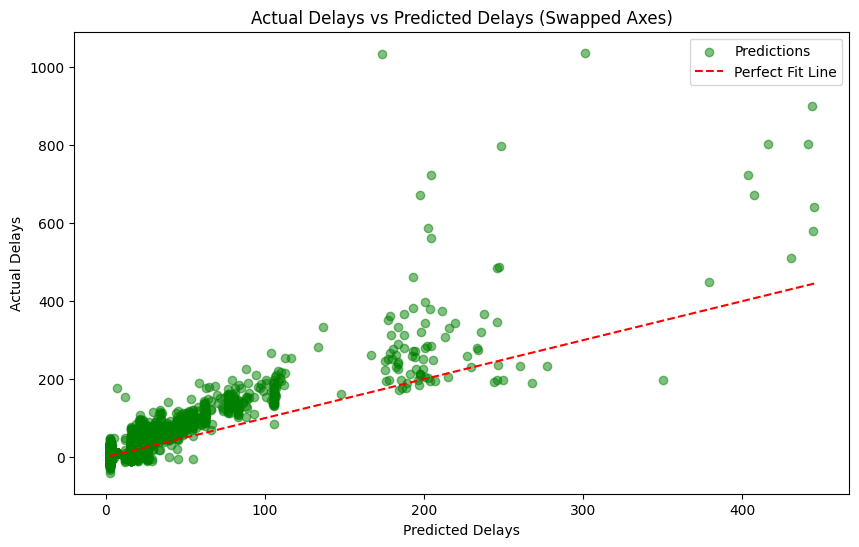

In [22]:
residuals = y_test - y_pred
# Actual Delays vs Predicted Delays (Swapped Axes)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5, color='green', label='Predictions')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Actual Delays vs Predicted Delays (Swapped Axes)')
plt.xlabel('Predicted Delays')
plt.ylabel('Actual Delays')
plt.legend()
plt.show()

The line represents perfect fit, comparing actual delays versus predicted delays. The closer the points are to the line, the better the prediction is relating to the truth - the error is smaller.

The model works better with lower delays (0-100 minutes)

the model lacks performance with higher delays (>=101).

There are less delays which are big delays, so the prediction is working worse on those ranges.
We an see there's a bias in the bigger delays, the bias is growing to the positive values (predicts higher delay than the truth).

So, lets check the MSE.

MSE for delay range 0-50: 110.58078912404112
MSE for delay range 50-100: 1124.384275619585
MSE for delay range 150-200: 5749.778295881085
MSE for delay range 100-150: 2987.512563060832
MSE for delay range 200-250: 5270.45192263196
MSE for delay range 300-350: 20705.001219063546
MSE for delay range 250-300: 9728.402248649209
MSE for delay range 350-400: 34290.379822855655


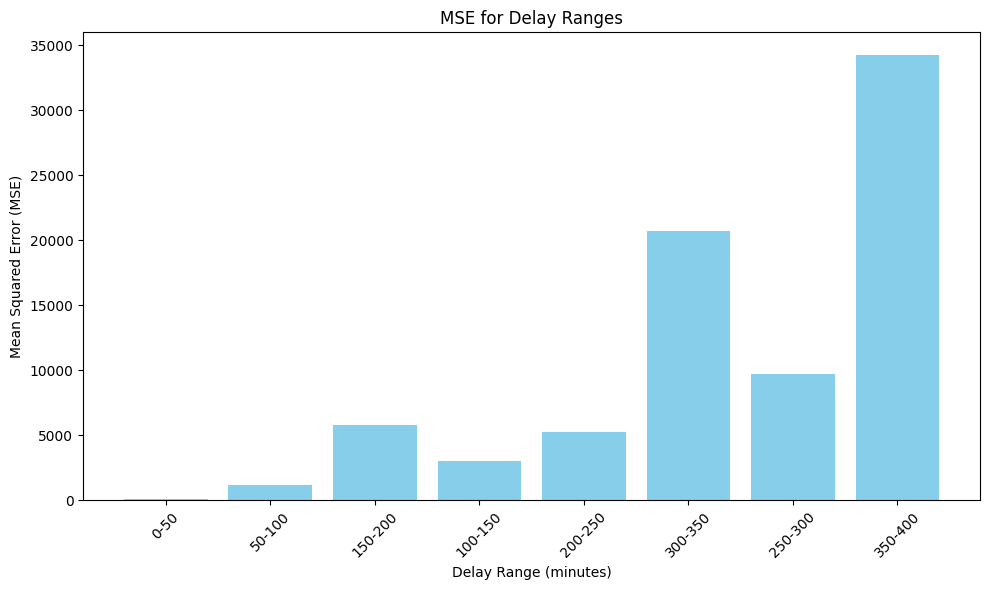

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the bins for delays (0-50, 50-100 ...)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]

# Create a new column in the data that categorizes delays into bins
df_processed['delay_range'] = pd.cut(df_processed['DEP_DELAY'], bins=bins, labels=[f'{x}-{y}' for x, y in zip(bins[:-1], bins[1:])])

# Initialize a dictionary to store MSE values for each delay range
mse_dict = {}

# Loop through each bin and calculate the MSE for each range
for delay_range in df_processed['delay_range'].unique():
    bin_indices = df_processed['delay_range'] == delay_range
    X_bin = X[bin_indices]
    y_bin = y[bin_indices]

    if len(y_bin) > 0:
        # Make predictions using the best model (or fallback model if necessary)
        y_pred_bin = best_model.predict(X_bin) if 'best_model' in locals() else xgb_model.predict(X_bin)

        mse = mean_squared_error(y_bin, y_pred_bin)
        mse_dict[delay_range] = mse

# Print the MSE for each delay range
for delay_range, mse in mse_dict.items():
    print(f"MSE for delay range {delay_range}: {mse}")

# Plot the MSE for each range
ranges = list(mse_dict.keys())
mse_values = list(mse_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(ranges, mse_values, color='skyblue')
plt.xlabel('Delay Range (minutes)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Delay Ranges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Over vs. Under estimation

Does the model tend to overestimate or underestimate?

In [26]:
residuals = y_test - y_pred

# Calculate percentage of overestimations and underestimations
overestimation = np.sum(residuals < 0) / len(residuals) * 100
underestimation = np.sum(residuals > 0) / len(residuals) * 100

print(f"Overestimation Percentage: {overestimation:.2f}%")
print(f"Underestimation Percentage: {underestimation:.2f}%")


Overestimation Percentage: 71.70%
Underestimation Percentage: 28.30%


So in the analysis, we can see that most (71.7%) of the predictions are overestimations, which matches the overestimates presented in predicted vs. actual delays above. Therefore, the model tends to over estimate the delays, thanks to many delays which are very large and give more weight to the prediction than smalled delays.

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Ensure all rows are displayed in the correlation output
pd.set_option('display.max_rows', None)

columns_to_exclude = [col for col in X_test.columns if col.startswith('ARR_DELAY_')]

# Remove the unwanted columns
X_test_filtered = X_test.drop(columns=columns_to_exclude)

# Calculate correlation of residuals with the filtered features
residual_corr = pd.concat([X_test_filtered, pd.Series(residuals, name='Residuals')], axis=1).corr()['Residuals'].sort_values(ascending=False)

print("Correlation of Residuals with Features (excluding ARR_DELAY_x columns):")
print(residual_corr)

pd.set_option('display.max_rows', 10)


Correlation of Residuals with Features (excluding ARR_DELAY_x columns):
Residuals                  1.000000
DELAY_DUE_LATE_AIRCRAFT    0.148430
year                       0.116030
DEST_CITY                  0.106985
DEST                       0.076678
DOT_CODE                   0.072422
DELAY_DUE_SECURITY         0.045033
day                        0.037676
FL_NUMBER                  0.036634
CRS_DEP_TIME               0.029844
WHEELS_OFF                 0.028191
ORIGIN_CITY                0.025122
DEP_TIME                   0.022902
CRS_ARR_TIME               0.013327
DELAY_DUE_WEATHER          0.012366
CANCELLATION_CODE          0.010837
month                     -0.011941
Month                     -0.011941
ORIGIN                    -0.015002
CANCELLED                 -0.015391
ARR_TIME                  -0.021184
DELAY_DUE_CARRIER         -0.022616
WHEELS_ON                 -0.049379
DELAY_DUE_NAS             -0.065391
AIRLINE_DOT               -0.082316
AIRLINE                   -0

We can see that attributes such as delay due to diff. reasons play bigger part, especially late aircraft. Year of flight is also playing a role (CoViD-19 might play a role here, as the staff was short most likely), and some impact of the airline code - delays in some companies are most prevalent than others.